# Simple Linear Regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is perhaps the most simple of all of the models. Do you remember the linear formula where `m` is the slope and `b` is where the line starts on the y-axis?

$$y=mx+b$$

This is a simple linear model since there is only one coefficient - `mx`.

## Imports and load data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import mlflow
import mlflow.sklearn
sns.set()
%matplotlib inline

In [10]:
data_ver = 1
model_ver = 1
mlflow.start_run() 

<ActiveRun: >

In [12]:
mlflow.log_param("data_ver", data_ver)
mlflow.log_param("model_ver", model_ver)

df = pd.read_csv("../data/SalaryData%s.csv" % data_ver)

In [13]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
df.shape

(30, 2)

Before continuing, check if there are any missing data in the data set.

In [15]:
df.isnull().values.any()

False

## Split data

Splitting the depedent variable (`Salary`) out from the indepedent variable (`YearsExperience`) so we can build our model.

We use the `train_test_split` method from `scikit-learn` to split our data. The `test_size` is used to tell it what percentage of the data to use for our testing data set and the `random_state` is used as a seed for the random splitting of the data. The seed will randomize the split in the same way each time for reproducability.

In [16]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
df_copy = train_set.copy()

In [18]:
df_copy.shape

(24, 2)

In [19]:
df_copy.head()

,YearsExperience,Salary
28,10.3,122391.0
24,8.7,109431.0
12,4.0,56957.0
0,1.1,39343.0
4,2.2,39891.0


## Exploratory Data Analysis

Explore the data to find trends. Using the `describe` method to get descriptive statistics on numerical columns of our data. The `corr` method to calculate correlations between the columns of our data. And plotting with `matplotlib` via the `plot` method to get a visual of the data. Also using `seaborn`'s `regplot` to give us what a linear regression line of our data may look like and to verify that our data looks linear.

In [20]:
df_copy.describe()

,YearsExperience,Salary
count,24.000000,24.000000
mean,5.187500,74207.625000
std,2.943129,28240.733473
min,1.100000,37731.000000
25%,2.975000,55456.750000
50%,4.300000,62164.500000
75%,7.300000,99030.250000
max,10.500000,122391.000000


In [21]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.00000,0.98211
Salary,0.98211,1.00000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


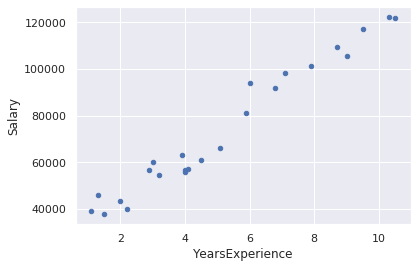

In [22]:
df_copy.plot.scatter(x='YearsExperience', y='Salary')

/home/anllogui/anaconda3/envs/pythonCI/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


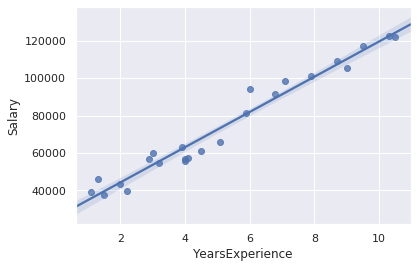

In [23]:
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=df_copy)

## Predict

We're making three other data sets for the `LinearRegression` model:
- `test_set` that is just the `YearsExperience` column (dropping the `Salary` column) that will be used for analyzing and scoring our model.
- `train_labels` that is just the `Salary` column to train the `LinearRegression` model what the answers are when passing in the years of experience input.
- `train_set` that is also just the `YearsExperience` column (dropping the `Salary` column) that will be passed into the `LinearRegression`'s `fit` method as the `x` parameter.

In [24]:
test_set_full = test_set.copy()

test_set = test_set.drop(["Salary"], axis=1)

In [25]:
test_set.head()

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2


In [26]:
train_labels = train_set["Salary"]

In [27]:
train_labels.head()

28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
Name: Salary, dtype: float64

In [28]:
train_set_full = train_set.copy()

train_set = train_set.drop(["Salary"], axis=1)

In [29]:
train_set.head()

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2


Now that we have our data in the correct form, we pass in the `train_set` and `train_labels` into the `fit` method to train the model.

In [30]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now we have a model and can call the `predict` function on it with inputs. 

In [31]:
salary_pred = lin_reg.predict(test_set)

salary_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

## Analyze Results

We can get the coefficients and intercept from our model.

In [36]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

mlflow.log_metric("coef", float(lin_reg.coef_))
mlflow.log_metric("intercept", float(lin_reg.intercept_))

Coefficients:  [9423.81532303]
Intercept:  25321.583011776813


With that information we can build our line formula - $y=9423.81532303x + 25321.5830118$

We can compare our predictions to our testing set label columns.

In [37]:
print(salary_pred)
print(test_set_full["Salary"])

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


Models in `scikit-learn` have a `score` method. Depending on the model, this method will do a different calculation. For `LinearRegression` it calculates the $r^2$.

In [38]:
lin_reg.score(test_set, test_set_full["Salary"])

0.9024461774180497

There's also a separate `r2_score` method that will calculate the $r^2$.

In [43]:
score = r2_score(test_set_full["Salary"], salary_pred)
mlflow.log_metric("score", score)
print(score)


0.9024461774180497


We can also plot our test data as a scatter plot and, with our predicted salary that we got from our model, plot a line to see how well it fits the data.

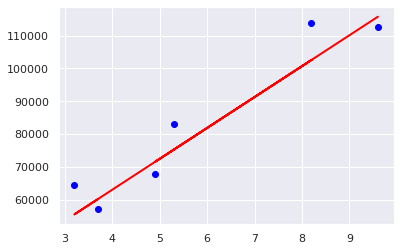

In [44]:
plt.scatter(test_set_full["YearsExperience"], test_set_full["Salary"], color='blue')
plt.plot(test_set_full["YearsExperience"], salary_pred, color='red', linewidth=2)

## Export model to disk

In [48]:
from sklearn.externals import joblib

joblib.dump(lin_reg, "../models/linear_regression_model_v%s.pkl" % model_ver)
mlflow.sklearn.log_model(lin_reg, "model")